In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

In [9]:
#Commande de réinitialisation pratique qui remet tous les paramètres de Matplotlib à leurs valeurs par défaut
plt.rcdefaults()

In [10]:
#Read dataset
data = pd.read_csv("/content/predictive_maintenance.csv")

In [11]:
data.head(10)

,UDI,Product ID,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,No Failure
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,No Failure
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,No Failure
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,No Failure
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,No Failure


##Feature comprehension

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UDI                  10000 non-null  int64  
 1   Product ID           10000 non-null  object 
 2   Type                 10000 non-null  object 
 3   Air temperature      10000 non-null  float64
 4   Process temperature  10000 non-null  float64
 5   Rotational speed     10000 non-null  int64  
 6   Torque               10000 non-null  float64
 7   Tool wear            10000 non-null  int64  
 8   Target               10000 non-null  int64  
 9   Failure Type         10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [13]:
#Rename column
data.columns = ['UDI', 'Product ID', 'Type', 'Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear', 'Machine failure', 'Failure type']

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature,10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature,10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed,10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque,10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear,10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0


In [15]:
data.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
Product ID,10000,10000,M14860,1
Type,10000,3,L,6000
Failure type,10000,6,No Failure,9652


In [16]:
data['Failure type'].value_counts()


Failure type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [17]:
data['Type'].value_counts()

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64

##Exploratory Data Analysis

In [18]:
num_cols = ['Air temperature', 'Process temperature', 'Rotational speed','Torque', 'Tool wear']
cat_cols = ['Type', 'Failure type']
label = 'Machine failure'

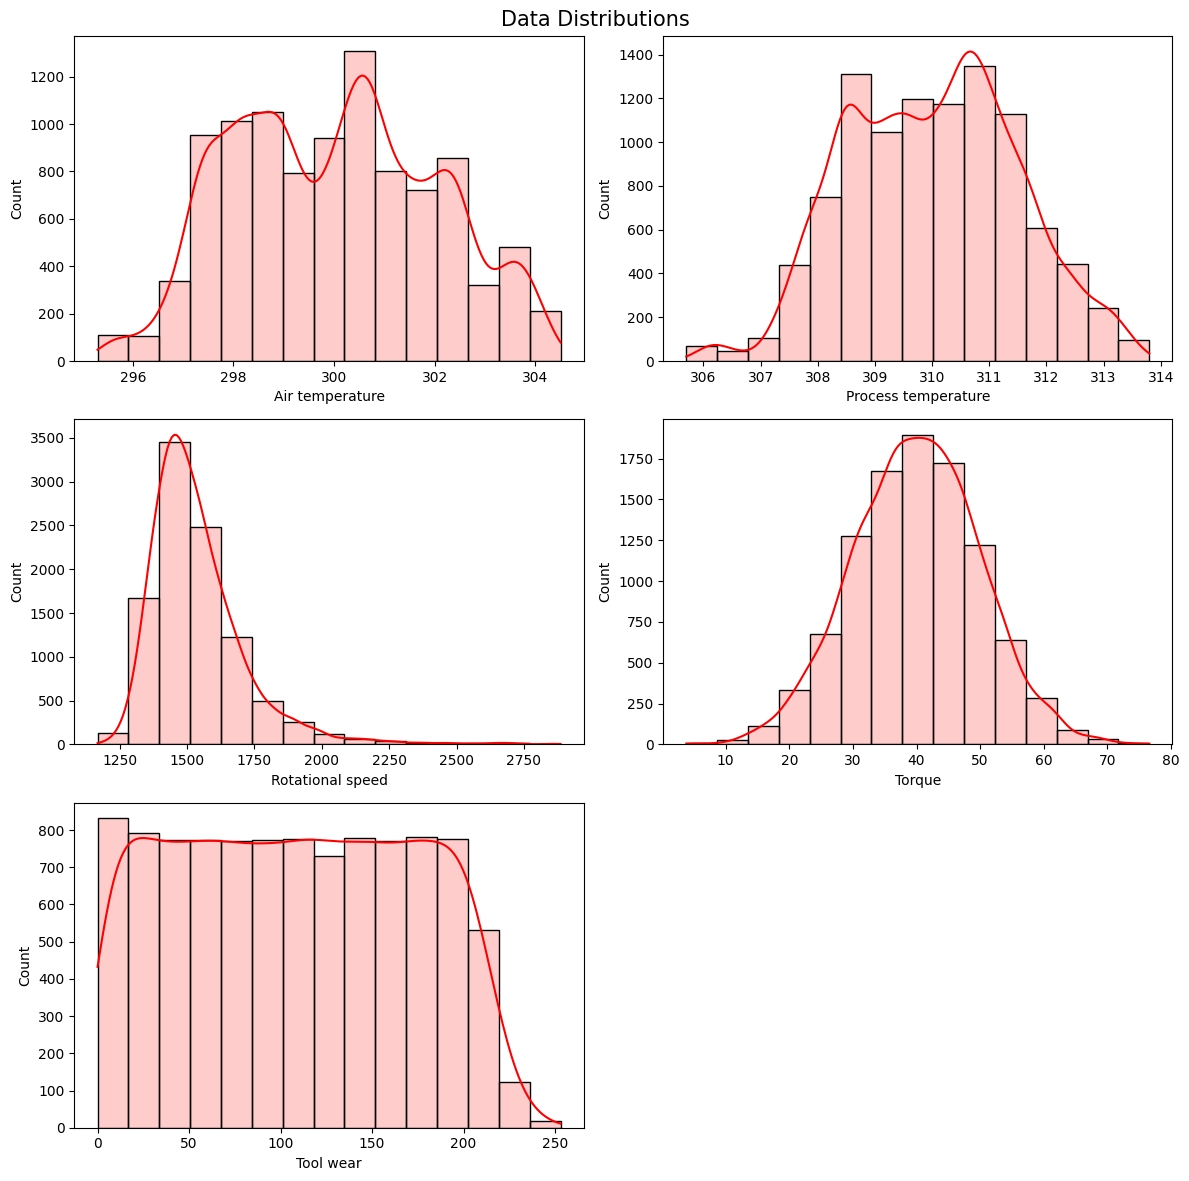

In [19]:
plt.figure(figsize = (12, 12))
for i, col in enumerate(num_cols):
    plt.subplot(3,2, i+1)
    sns.histplot(data, x = col, kde = True, alpha = 0.2, color = 'red', bins = 15)
plt.suptitle("Data Distributions", fontsize = 15)
plt.tight_layout()
plt.show()

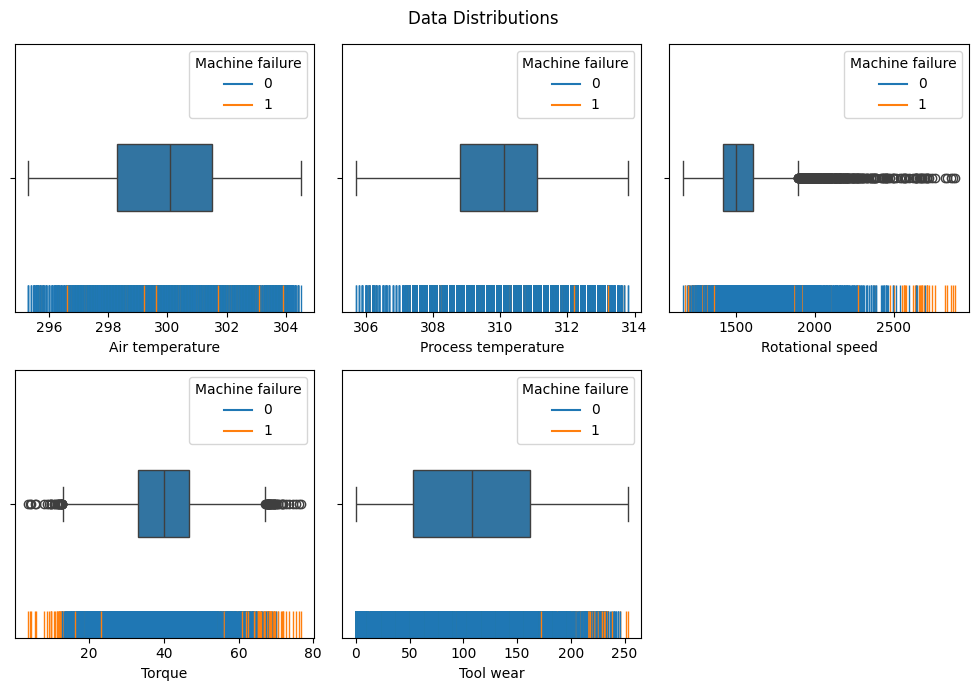

In [20]:
plt.figure(figsize = (10, 7))
for i, col in enumerate(num_cols):
    plt.subplot(2,3, i+1)
    sns.rugplot(data, x = col, hue = label, height = 0.1)
    sns.boxplot(data, x = col, width = 0.25)
plt.suptitle("Data Distributions")
plt.tight_layout()
plt.show()

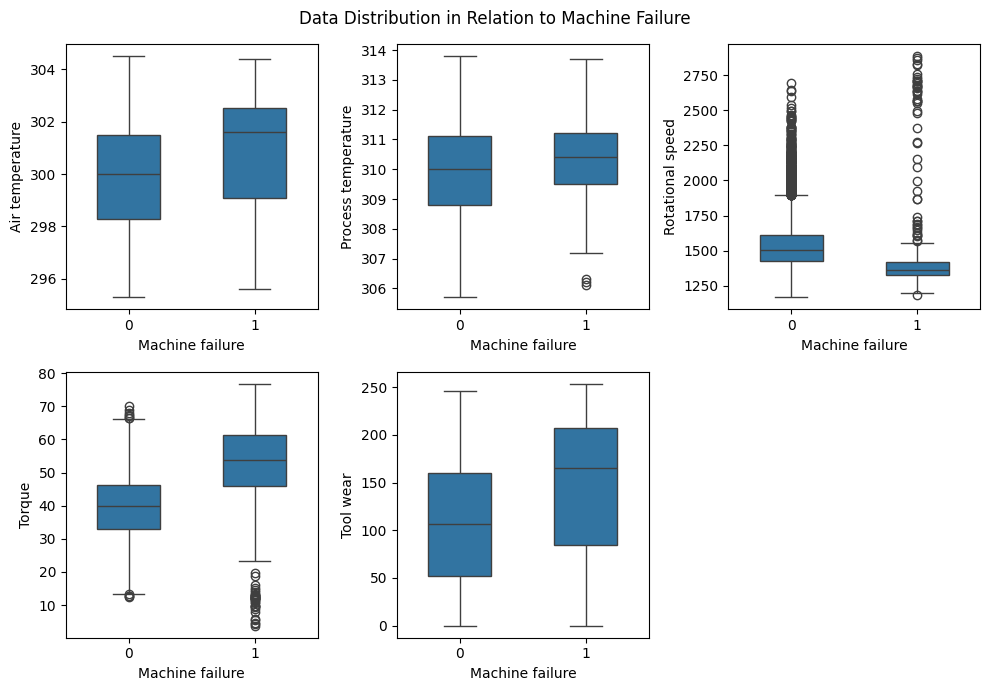

In [21]:
plt.figure(figsize = (10, 7))
for i, col in enumerate(num_cols):
    plt.subplot(2,3, i+1)
    sns.boxplot(data, x = label, y = col, width = 0.5)
plt.suptitle("Data Distribution in Relation to Machine Failure")
plt.tight_layout()
plt.show()

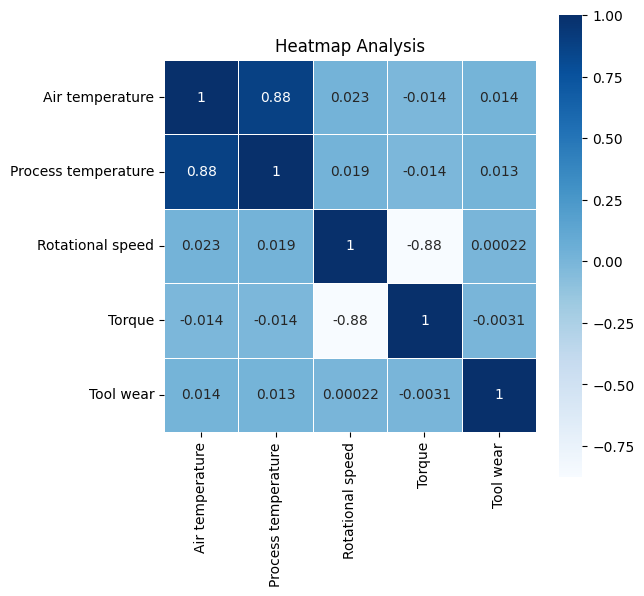

In [22]:
plt.figure(figsize = (6,6))
sns.heatmap(data[num_cols].corr(), square = True, annot = True, cmap = 'Blues', linewidths = 0.5)
plt.title("Heatmap Analysis")
plt.show()
#correlation entre les attributs

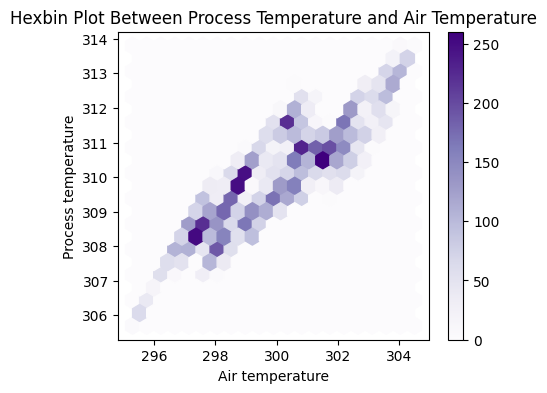

In [23]:
data.plot.hexbin(x='Air temperature', y='Process temperature', gridsize=20, cmap='Purples', figsize = (5,4))
plt.title("Hexbin Plot Between Process Temperature and Air Temperature")
plt.show()

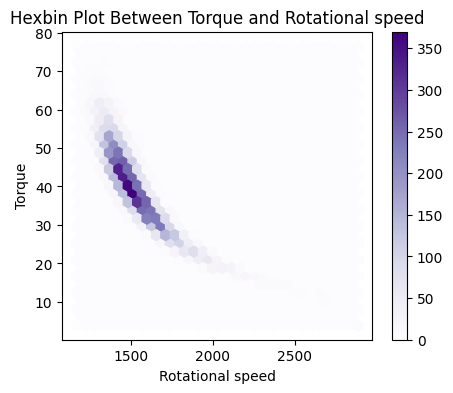

In [24]:
data.plot.hexbin(x='Rotational speed', y='Torque', gridsize=30, cmap='Purples', figsize = (5,4))
plt.title("Hexbin Plot Between Torque and Rotational speed")
plt.show()

In [25]:
type_machine_failure = data[['Type', 'Machine failure']].pivot_table(index = 'Type', columns='Machine failure', aggfunc= lambda x: len(x), margins = True)

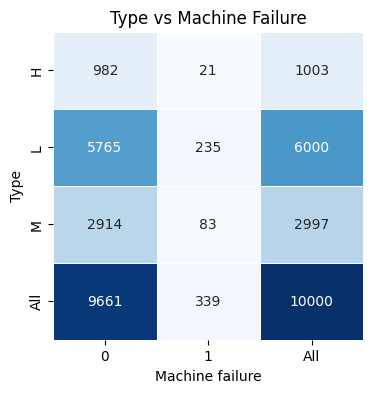

In [26]:
plt.figure(figsize=(4,4))
sns.heatmap(type_machine_failure, annot=True, fmt='g', cmap='Blues', cbar=False, linewidths=0.5)
plt.title("Type vs Machine Failure")
plt.show()

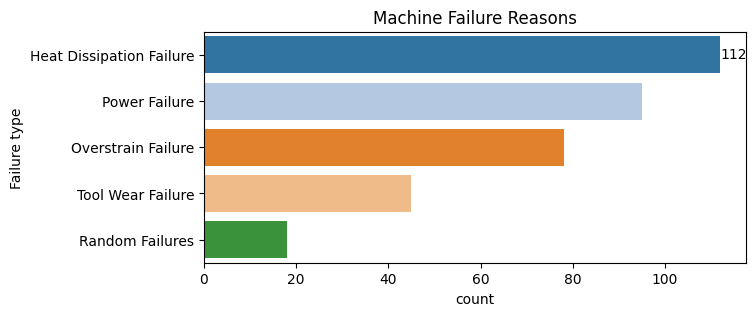

In [27]:
plt.figure(figsize = (7, 3))
ax = sns.countplot(data[data['Failure type'] != 'No Failure'], y = "Failure type", palette = 'tab20', order=data[data['Failure type'] != 'No Failure']['Failure type'].value_counts().index)
plt.title("Machine Failure Reasons")
ax.bar_label(ax.containers[0])
plt.show()

##Feature Engineering

In [28]:
data['Power'] = 2 * np.pi * data['Rotational speed'] * data['Torque'] / 60

In [29]:
data['temp_diff'] = data['Process temperature'] - data['Air temperature']

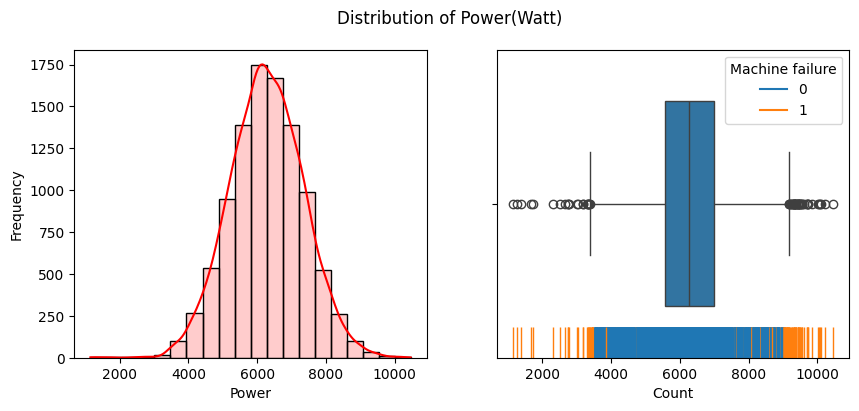

In [30]:
fig, ax = plt.subplots(1, 2, figsize = (10,4))

sns.histplot(data['Power'], bins = 20, ax = ax[0], color = 'red', alpha = 0.2, kde = True)
ax[0].set_ylabel("Frequency")

sns.boxplot(x = data['Power'], ax = ax[1], width = 0.25)
sns.rugplot(data, x = 'Power', hue = 'Machine failure', ax = ax[1], height = 0.1)
ax[1].set_xlabel("Count")

fig.suptitle("Distribution of Power(Watt)")

fig.show()

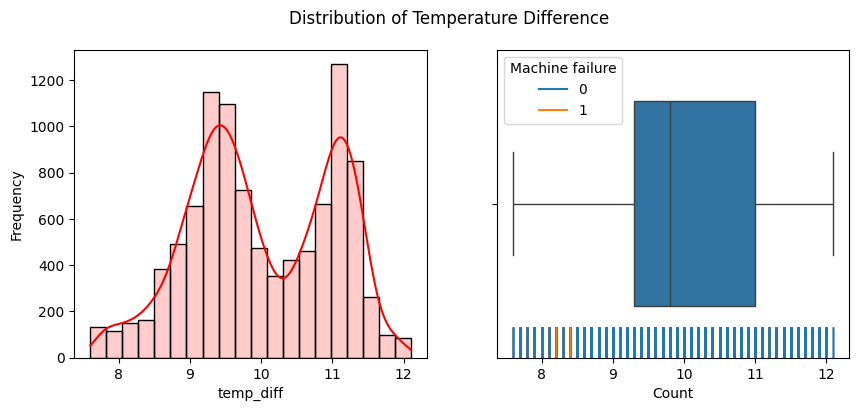

In [31]:
fig, ax = plt.subplots(1, 2, figsize = (10,4))

sns.histplot(data['temp_diff'], bins = 20, ax = ax[0], color = 'red', alpha = 0.2, kde = True)
ax[0].set_ylabel("Frequency")

sns.boxplot(x = data['temp_diff'], ax = ax[1], width = 0.25)
sns.rugplot(data, x = 'temp_diff', hue = 'Machine failure', ax = ax[1], height = 0.1)
ax[1].set_xlabel("Count")

fig.suptitle("Distribution of Temperature Difference")

fig.show()

##Data Preprocessing

In [32]:
# UDI and Product ID are high cardinality features, Removing Process Temperature due to multi-collinearity
data = data.drop(['UDI', 'Product ID', 'Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Failure type'], axis = 1)

In [33]:
data = pd.get_dummies(data)


In [34]:
data[['Type_H', 'Type_L', 'Type_M']] = data[['Type_H', 'Type_L', 'Type_M']].astype('int')

In [35]:
data.head()

,Tool wear,Machine failure,Power,temp_diff,Type_H,Type_L,Type_M
0,0,0,6951.590560,10.5,0,0,1
1,3,0,6826.722724,10.5,0,1,0
2,5,0,7749.387543,10.4,0,1,0
3,7,0,5927.504659,10.4,0,1,0
4,9,0,5897.816608,10.5,0,1,0


##Training Model

In [36]:
!pip -q install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 17.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3

In [1]:
!pip -q install --upgrade scipy

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.3.2 requires scipy<=1.11.4,>=1.6.1, but you have scipy 1.13.0 which is incompatible.


In [38]:
!pip install --upgrade pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 34.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.0
    Uninstalling scipy-1.13.0:
      Successfully uninstalled scipy-1.13.0


In [39]:
!pip -q install --upgrade yellowbrick

In [40]:
import pycaret

In [41]:
from pycaret.classification import *

In [42]:
s= setup(data, target = 'Machine failure', session_id = 42, data_split_stratify=True)

,Description,Value
0,Session id,42
1,Target,Machine failure
2,Target type,Binary
3,Original data shape,"(10000, 7)"
4,Transformed data shape,"(10000, 7)"
5,Transformed train set shape,"(7000, 7)"
6,Transformed test set shape,"(3000, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [43]:
best_model = compare_models(sort = 'AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9807,0.9693,0.5264,0.8461,0.6412,0.6321,0.6545,0.8320
lightgbm,Light Gradient Boosting Machine,0.9774,0.9575,0.5359,0.7266,0.6111,0.6000,0.6102,0.8040
xgboost,Extreme Gradient Boosting,0.9761,0.9541,0.5272,0.7072,0.5969,0.5850,0.5953,0.2100
ada,Ada Boost Classifier,0.9749,0.9482,0.4636,0.7108,0.5534,0.5412,0.5581,0.2590
rf,Random Forest Classifier,0.9801,0.9467,0.5230,0.8332,0.6302,0.6210,0.6442,1.2130
et,Extra Trees Classifier,0.9750,0.9263,0.3710,0.7888,0.4967,0.4858,0.5255,0.4630
nb,Naive Bayes,0.9711,0.8675,0.1641,0.8967,0.2712,0.2641,0.3667,0.0800
ridge,Ridge Classifier,0.9661,0.8106,0.0000,0.0000,0.0000,0.0000,0.0000,0.1060
lda,Linear Discriminant Analysis,0.9671,0.8106,0.0337,0.6500,0.0637,0.0615,0.1433,0.0400
lr,Logistic Regression,0.9673,0.8104,0.0422,0.6667,0.0785,0.0757,0.1602,1.4470


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [44]:
save_model(best_model, 'predictive_maintenance')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Tool wear', 'Power', 'temp_diff',
                                              'Type_H', 'Type_L', 'Type_M'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclud...
                                             criterion='friedman_mse', init=None,
                                             lea